In [1]:
from keras.datasets import cifar10
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()
# (x_img_train,y_label_train),(x_img_test,y_label_test)=mnist.load_data()
# x_img_train=x_img_train.reshape(x_img_train.shape[0],28,28,1)
# x_img_test=x_img_test.reshape(x_img_test.shape[0],28,28,1)
x_img_train_normalize=x_img_train.astype(float)/255
x_img_test_normalize=x_img_test.astype(float)/255
y_label_train_oht=np_utils.to_categorical(y_label_train)
y_label_test_oht=np_utils.to_categorical(y_label_test)

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt

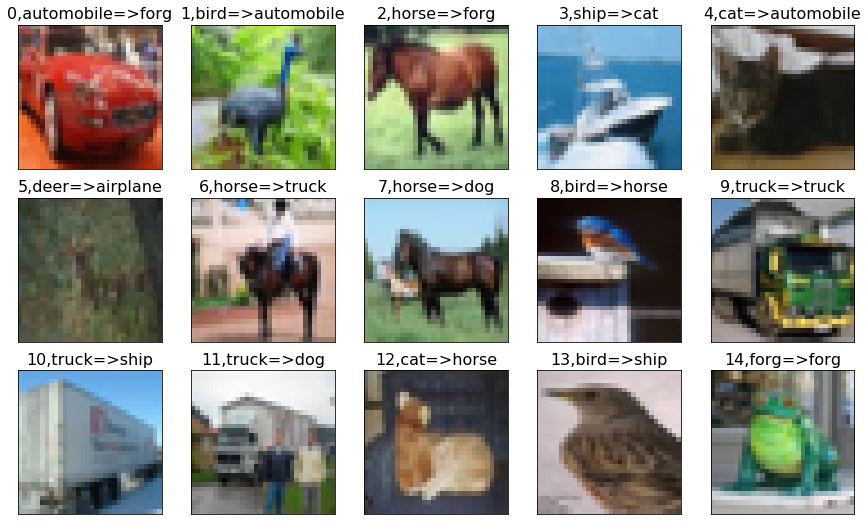

In [57]:
label_dict={0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'forg',7:'horse',8:'ship',9:'truck'}
#批量查看数据
#images=图像集,labels=标签集,index=当前索引位置,num_x=显示宽度,num_y=显示高度
def plot_image_labels(images,labels,prediction,index,num_x=3,num_y=3):
    fig=plt.gcf()
    fig.set_size_inches(num_x*3,num_y*3)#每个数据2.5英寸大
    for item in range(num_x*num_y):
        ax=plt.subplot(num_y,num_x,item+1)#num_y行,num_x列,第item+1个图形
        ax.imshow(images[index],cmap='binary')
        title=str(item)+','+label_dict[labels[index][0]]
        if len(prediction):
            title+='=>'+label_dict[prediction[index]]
        ax.set_title(title,fontsize=16)
        #设置无坐标
        ax.set_xticks([])
        ax.set_yticks([])
        #ax.axis('off')#设置无坐标和坐标轴
        index+=1
    plt.show()

#plot_image_labels(train_image,train_label,0)
plot_image_labels(x_img_train,y_label_train,prediction,5,5)#显示25个数据

In [3]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu',padding='same'))
# model.add(Conv2D(filters=32,kernel_size=(5,5),input_shape=(28,28,1),activation='relu',padding='same'))
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(rate=0.25))
model.add(Dense(units=1024,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=10,activation='softmax'))
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxP

In [4]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
train_history=model.fit(x_img_train_normalize,y_label_train_oht,validation_split=0.2,epochs=8,batch_size=100,verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/8
11000/40000 [=======>......................] - ETA: 44s - loss: 1.8648 - acc: 0.3235

KeyboardInterrupt: 

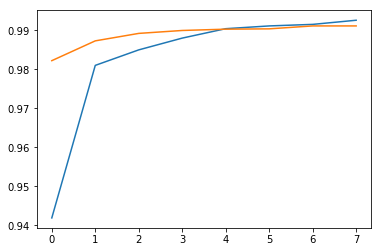

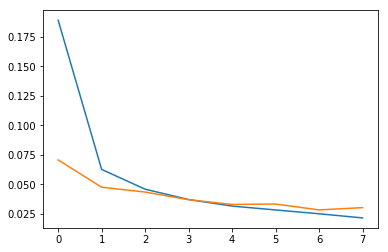

In [68]:
def show_train(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.show()
show_train(train_history,'acc','val_acc')
show_train(train_history,'loss','val_loss')

In [69]:
scores=model.evaluate(x_img_test_normalize,y_label_test_oht)
print(scores)
prediction=model.predict_classes(x_img_test_normalize)

 9760/10000 [============================>.] - ETA: 0s

label: cat predict: cat


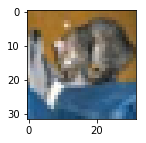

airplane probability: 0.000661022
automobile probability: 0.000837059
bird probability: 0.00268441
cat probability: 0.544203
deer probability: 0.00224521
dog probability: 0.433952
forg probability: 0.00376572
horse probability: 0.00471824
ship probability: 0.00638639
truck probability: 0.000546673


In [59]:
predicted_probability=model.predict(x_img_test_normalize)
def show_predicted_probability(y,prediction,x_img,predicted_probability,i):
    print('label:',label_dict[y[i][0]],'predict:',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img[i],(32,32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j],'probability:',predicted_probability[i][j])
show_predicted_probability(y_label_test,prediction,x_img_test,predicted_probability,0)

In [52]:
model.save_weights('cifar_cnn_model.h5')
model.load_weights('cifar_cnn_model.h5')